# Load and Preprocess the Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv") 

# Quick check
df.head()
df.info()
df.describe()

# Drop Car_ID or unnecessary features
df.drop(['car_ID'], axis=1, inplace=True)

# Extract company name from car name
df['CarCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df.drop('CarName', axis=1, inplace=True)

# Fix spelling mistakes in company names (if any)
df['CarCompany'].replace({'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'maxda': 'mazda'}, inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

C:\Users\HP\AppData\Local\Temp\ipykernel_13472\480777061.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarCompany'].replace({'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'maxda': 'mazda'}, inplace=True)


In [2]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_plymouth,CarCompany_porcshce,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_toyouta,CarCompany_volkswagen,CarCompany_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False


# Implement Regression Models

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

results = {}

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

pd.DataFrame(results).T.sort_values(by="R2 Score", ascending=False)


,R2 Score,MSE,MAE
Random Forest,9.568379e-01,3.407392e+06,1.296970e+03
Gradient Boosting,9.244813e-01,5.961752e+06,1.735079e+03
Decision Tree,8.931141e-01,8.438002e+06,1.913045e+03
Support Vector Regressor,-1.006251e-01,8.688777e+07,5.701472e+03
Linear Regression,-3.099536e+22,2.446898e+30,2.442958e+14


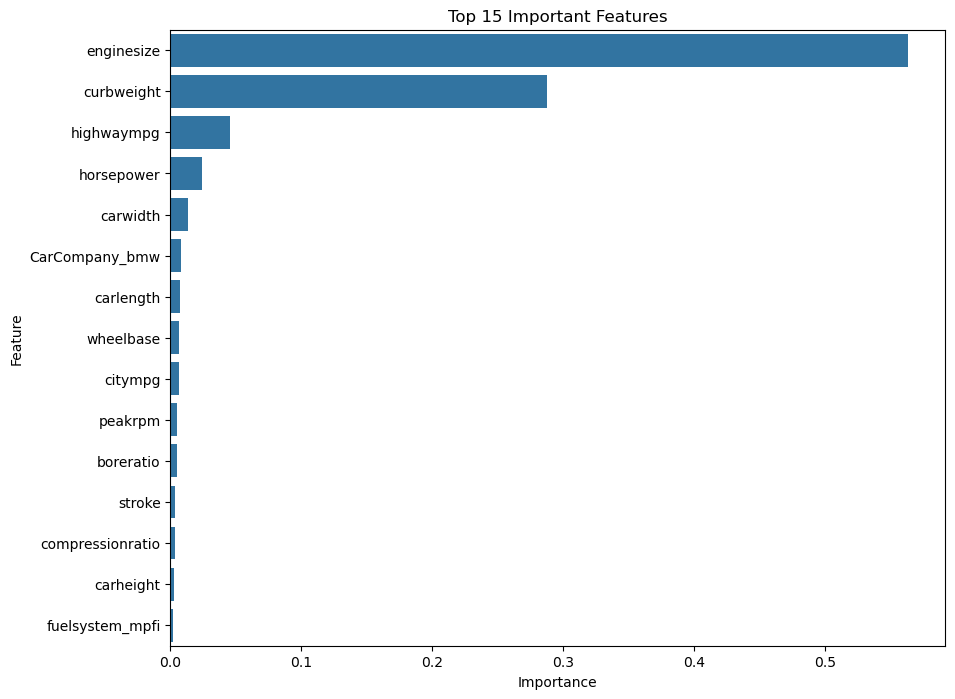

In [4]:
# Feature importance from Random Forest
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature')
plt.title("Top 15 Important Features")
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV

# Example: Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_
y_pred_tuned = best_rf.predict(X_test_scaled)

print("Tuned Random Forest:")
print("R2 Score:", r2_score(y_test, y_pred_tuned))
print("MSE:", mean_squared_error(y_test, y_pred_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_tuned))


Tuned Random Forest:
R2 Score: 0.9583865613009687
MSE: 3285132.173530685
MAE: 1271.831532229965
